## Part 2 [Total: 40 points] - Applying Tabular Methods

## Double Q Learning - Deterministic

In [ ]:
env_det = FrozenLakeEnv()
epsilon = 1.0  
epsilon_min = 0.01  
gamma = 0.95 
alpha = 0.15 
decay_rate = 0.995  
total_episodes = 1000
max_timestamp = 10

qt1 = np.zeros((env_det.obs_space.n, env_det.action_space.n))  # Q-table 1 initialization
qt2 = np.zeros((env_det.obs_space.n, env_det.action_space.n))  # Q-table 2 initialization

rewards_epi = []
epsilon_values = []
steps_per_episode = []
penalties_per_episode = []

final_state = None

for episode in range(total_episodes):
    state, _ = env_det.reset()
    state_index = env_det.obs_space_to_index(state)
    total_rewards = 0
    total_steps = 0

    while True:
        total_steps += 1
        action = env_det.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax((qt1[state_index] + qt2[state_index]) / 2)
        next_state, reward, terminated, truncated, _ = env_det.step(action)
        next_strt_idx = env_det.obs_space_to_index(next_state)
        if np.random.uniform(0, 1) < 0.5:
            qt1[state_index, action] += alpha * (reward + gamma * qt2[next_strt_idx, np.argmax(qt1[next_strt_idx])] - qt1[state_index, action])
        else:
            qt2[state_index, action] += alpha * (reward + gamma * qt1[next_strt_idx, np.argmax(qt2[next_strt_idx])] - qt2[state_index, action])
        state_index = next_strt_idx
        total_rewards += reward
        if terminated or truncated or total_steps >= max_timestamp:
            break

    penalties_per_episode.append(env_det.get_penalty_count())
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}")
        print("Q-table 1:")
        print(qt1)
        print("Q-table 2:")
        print(qt2)
        avg_penalty = np.mean(penalties_per_episode[-100:])
        print(f"Average Penalties in Last 100 Episodes: {avg_penalty}")

    epsilon = max(epsilon_min, epsilon * decay_rate)
    epsilon_values.append(epsilon)
    rewards_epi.append(total_rewards)
    steps_per_episode.append(total_steps)

    if (episode + 1) % 100 == 0:
        average_steps = np.mean(steps_per_episode[-100:])
        print(f"Episode: {episode + 1}, Average Steps: {average_steps}")

    if episode == total_episodes - 1:
        final_state = env_det.state

Episode: 100
Q-table 1:
[[ 4.44203487  8.18633458 11.85416368  8.64172487]
 [ 3.46093516  9.34344823 12.0930265   6.09384082]
 [ 0.          0.          0.          0.        ]
 [ 1.20764956  2.26181567  5.08217587  9.07809385]
 [-0.89981292  2.7856339   5.11531748  2.19007779]
 [ 1.77219039  5.87305158  5.09193859  0.84162314]
 [ 0.60248264  8.51872763 -0.14901717  1.71720962]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.15       -0.128625    3.88382836 -0.7673582 ]
 [ 9.48435053  0.          0.2775     -0.01879452]
 [ 2.6021783   0.         -0.015       0.        ]
 [ 0.         -0.69493363  0.7068246   0.        ]
 [-0.015       0.06291875  3.25998486 -0.15      ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
Q-table 2:
[[ 3.9912651   8.14661117  9.98783913  8.92610903]
 [ 5.21168058  8.75845551 14.36755081  4.5665347 ]
 [ 0.          0.          0.          0.     

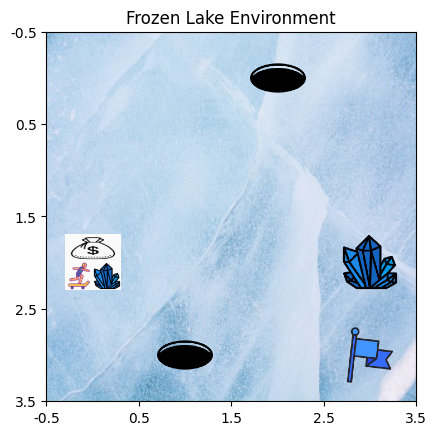

In [ ]:
env_det.state = final_state
env_det.render()

Step 2:
Save the Q-table/Policy table as a pickle file or h5 of the trained model and attach it to your assignment submission.

In [ ]:
import pickle
with open("charviku_assignment1_double_q1_table_deterministic.pkl", 'wb') as file:
    pickle.dump(qt1, file)

In [ ]:
with open("charviku_assignment1_double_q2_table_deterministic.pkl", 'wb') as file:
    pickle.dump(qt2, file)

Step 3. Provide the evaluation results:

(a) Print the initial Q-table and the trained Q-table

(b) Plot the total reward per episode graph (x-axis: episode, y-axis: total reward per episode).

(c) Plot the epsilon decay graph (x-axis: episode, y-axis: epsilon value)

(d) Run your environment for at least 10 episodes, where the agent chooses only greedy actions from the learned policy. Include a plot of the total reward per episode.

In [ ]:
print("Trained Q-table 1:")
print(qt1)
print("Trained Q-table 2:")
print(qt2)

Trained Q-table 1:
[[ 4.01325919e+01  4.79087114e+01  4.96150797e+01  4.49377210e+01]
 [ 2.21575594e+01  4.18128932e+01  5.24500225e+01  2.74240821e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.90964369e+01  4.64165172e+01  4.60138930e+01  5.24422425e+01]
 [ 8.95077463e+00  3.73256469e+01  9.16064404e+00  6.20914024e+00]
 [ 1.17490800e+00  3.26884186e+01  8.31722174e+00  9.77584249e+00]
 [ 2.13418838e+00  4.85424858e+01  4.72149590e+00  6.49072261e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.36453219e-01  8.14790964e-01  4.16363221e+00 -3.25672798e-01]
 [ 1.16489485e+01  1.29250725e+00  2.36676537e+00 -8.59333889e-02]
 [ 1.62341743e+01  0.00000000e+00 -1.50000000e-02  0.00000000e+00]
 [-1.50000000e-02 -1.20765531e+00  2.04732991e+00  7.02205808e-02]
 [-2.77500000e-02 -2.68705266e-01  1.55528819e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.000000

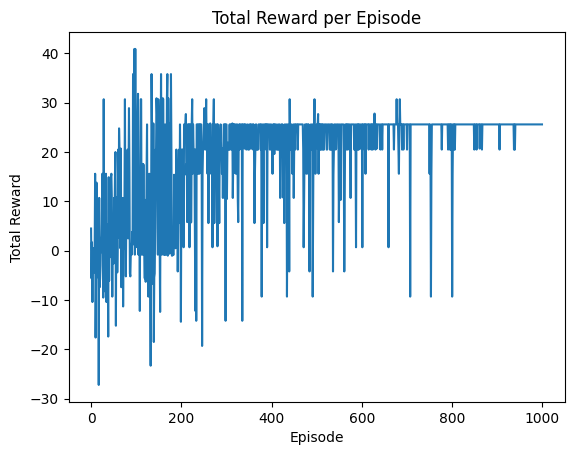

In [ ]:
plt.plot(rewards_epi)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

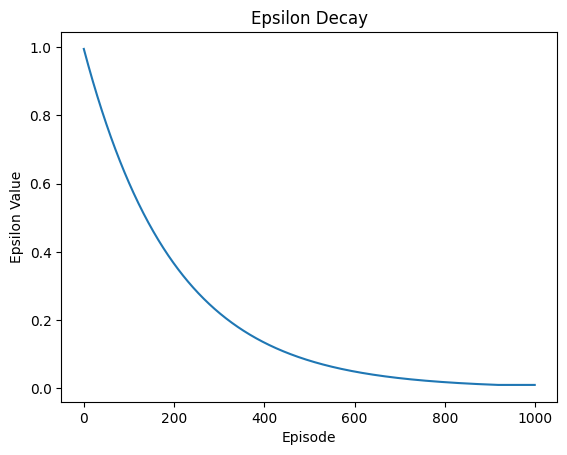

In [ ]:
plt.plot(epsilon_values)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.show()

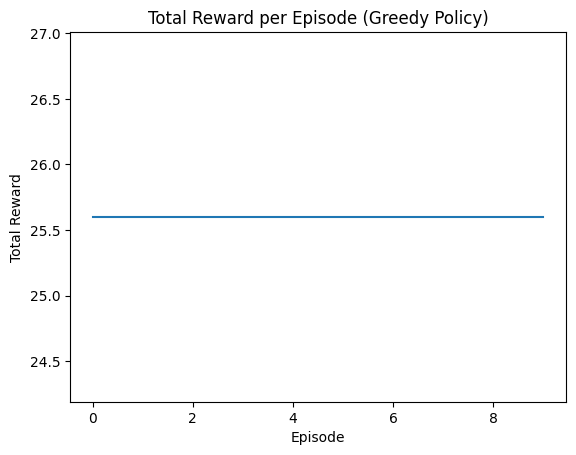

In [ ]:
greedy_rewards = []
for _ in range(10):
    state, _ = env_det.reset()
    state_index = env_det.obs_space_to_index(state)
    total_greedy_rewards = 0
    while True:
        action = np.argmax((qt1[state_index] + qt2[state_index]) / 2)
        next_state, reward, terminated, truncated, _ = env_det.step(action)
        state_index = env_det.obs_space_to_index(next_state)
        total_greedy_rewards += reward

        if terminated or truncated:
            break

    greedy_rewards.append(total_greedy_rewards)

plt.plot(greedy_rewards)
plt.title('Total Reward per Episode (Greedy Policy)')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()